In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
diccionario_tipos = {
    "tipodepropiedad":"category",
    "provincia":"category",
    "provincia":"category",
    #"habitaciones":"int",
    #"garages":"int",
    #"banos":"int",
    #'metroscubiertos':, 'metrostotales', 'idzona', 'lat', 'lng',
    'gimnasio':"bool",
    'usosmultiples':"bool",
    'piscina':"bool",
    'escuelascercanas':"bool",
    'centroscomercialescercanos':"bool"
}
df = pd.read_csv("data/train.csv", dtype = diccionario_tipos)

In [14]:
df.columns

Index(['id', 'titulo', 'descripcion', 'tipodepropiedad', 'direccion', 'ciudad',
       'provincia', 'antiguedad', 'habitaciones', 'garages', 'banos',
       'metroscubiertos', 'metrostotales', 'idzona', 'lat', 'lng', 'fecha',
       'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas',
       'centroscomercialescercanos', 'precio'],
      dtype='object')

Text(0, 0.5, 'Porcentaje')

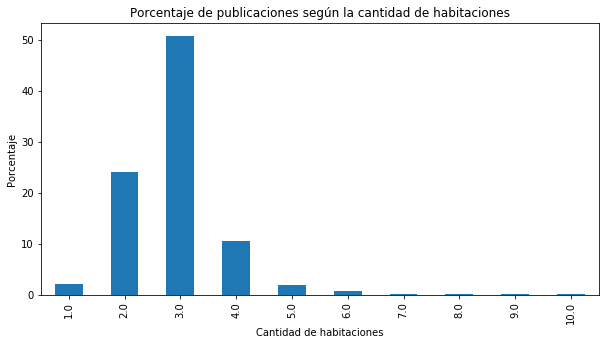

In [15]:
plt.figure(figsize=(10,5))
cantidad_habitaciones = df["habitaciones"].value_counts()
cantidad_habitaciones_porcentaje = cantidad_habitaciones *100 / len(df.index)
g = cantidad_habitaciones_porcentaje.sort_index().plot('bar')
plt.title("Porcentaje de publicaciones según la cantidad de habitaciones")
g.set_xlabel("Cantidad de habitaciones")
g.set_ylabel("Porcentaje")

Hay una clara mayoría de propiedades con 3 habitaciones, siendo estas el 50% de las publicaciones del Data Set. Y se ve muy claramente como las propiedades con muchas habitaciones (5+) son una clara minoría

#### Analisis de Propiedades con 3 habitaciones
Dado que las propiedades con 3 habitaciones resultan un numero muy importante en los datos vamos a explorarlas mas a fondo

<Figure size 1080x360 with 0 Axes>

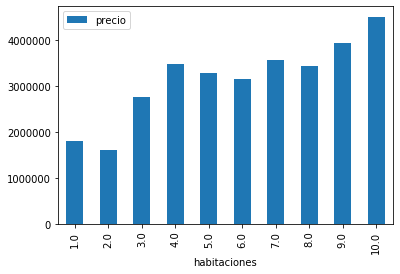

In [16]:
fig = plt.figure(figsize=(15,5))
g =df.groupby("habitaciones").agg({"precio":"mean"}).plot(kind = "bar")

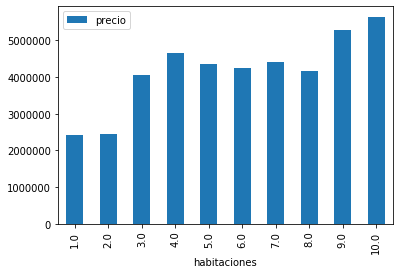

In [17]:
df.loc[df["provincia"] == "Distrito Federal"].groupby("habitaciones").agg({"precio":"mean"}).plot(kind = "bar")

In [18]:
df["cantidad"] = 1
ciudad = df.groupby(["provincia","habitaciones"]).agg({"cantidad":sum})
ciudad.unstack().T.idxmax().map(lambda x: x[1])

provincia
Aguascalientes           3.0
Baja California Norte    3.0
Baja California Sur      3.0
Campeche                 3.0
Chiapas                  3.0
Chihuahua                3.0
Coahuila                 3.0
Colima                   3.0
Distrito Federal         3.0
Durango                  3.0
Edo. de México           3.0
Guanajuato               3.0
Guerrero                 3.0
Hidalgo                  3.0
Jalisco                  3.0
Michoacán                3.0
Morelos                  3.0
Nayarit                  3.0
Nuevo León               3.0
Oaxaca                   3.0
Puebla                   3.0
Querétaro                3.0
Quintana Roo             3.0
San luis Potosí          3.0
Sinaloa                  3.0
Sonora                   3.0
Tabasco                  3.0
Tamaulipas               3.0
Tlaxcala                 3.0
Veracruz                 3.0
Yucatán                  3.0
Zacatecas                3.0
dtype: float64

#### Analisis de las propiedades con 1 habitacion

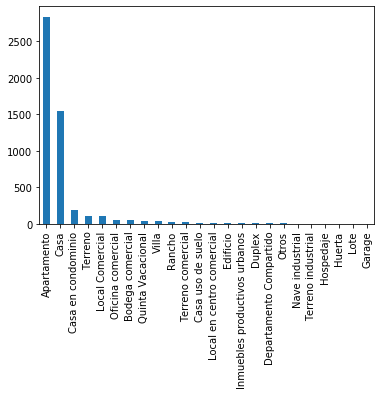

In [19]:
monoambientes = df.loc[df["habitaciones"] == 1]
monoambientes["tipodepropiedad"].value_counts().plot("bar")

Text(0.5, 1.0, 'Casas')

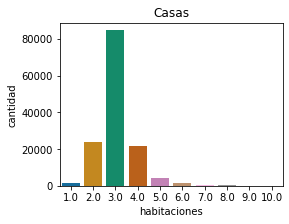

In [20]:
#lista = df.groupby(["tipodepropiedad"]).agg({"cantidad":sum}).sort_values("cantidad",ascending = False).head(3)
#lista = lista.index.to_list()
#principales = df[df["tipodepropiedad"].isin(lista)].copy()
plt.figure(figsize=(4, 3))
plt.ticklabel_format(style='plain', axis='y')
hab = df.loc[df.tipodepropiedad == 'Casa']
hab = hab.groupby(['tipodepropiedad', 'habitaciones']).agg({'cantidad':sum}).reset_index().copy()
sns.barplot(x="habitaciones",y="cantidad", data=hab, palette="colorblind").set_title('Casas')

ValueError: min() arg is an empty sequence

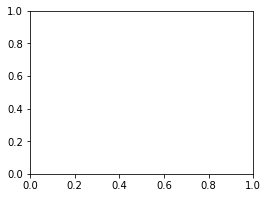

In [21]:
plt.figure(figsize=(4, 3))
plt.ticklabel_format(style='plain', axis='y')
hab = df.loc[df.tipodepropiedad == 'Departamento']
hab = hab.groupby(['tipodepropiedad', 'habitaciones']).agg({'cantidad':sum}).reset_index().copy()
sns.barplot(x="habitaciones",y="cantidad", data=hab, palette="colorblind").set_title('Departamentos')

Text(0.5, 1.0, 'Casa en condominio')

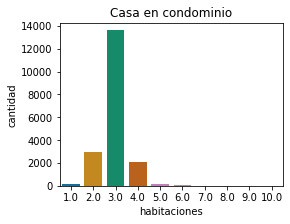

In [22]:
plt.figure(figsize=(4, 3))
plt.ticklabel_format(style='plain', axis='y')
hab = df.loc[df.tipodepropiedad == 'Casa en condominio']
hab = hab.groupby(['tipodepropiedad', 'habitaciones']).agg({'cantidad':sum}).reset_index().copy()
sns.barplot(x="habitaciones",y="cantidad", data=hab, palette="colorblind").set_title('Casa en condominio')